In [20]:
## BER Simulation for BPSK Modulation over AWGN Channel

import numpy as np
from numpy import linalg

num_bits_per_iteration = 1000
max_num_error, max_num_iteration = 500, 3e3

snr_dB = np.arange(-4, 5.1, 0.5) #SNR (Eb/N0) range in dB
snr_linear = 10 ** (snr_dB/10)
n0_linear = 1/snr_linear
error_prob = np.zeros(n0_linear.shape)

for k in range(n0_linear.size):
    N0 = n0_linear[k]
    num_error = 0
    num_iteration = 0
    bits = np.round(np.random.rand(num_bits_per_iteration))
    symbols = 2 * bits - 1


while(num_error<=max_num_error and num_iteration<=max_num_iteration):
    num_iteration += 1
    noise = np.random.randn(num_bits_per_iteration) * np.sqrt(N0/2)
    recieved_signal = symbols + noise
    symbols_hat = np.full(num_bits_per_iteration, -1) #a vector of length 1000 all with -1
    symbols_hat[recieved_signal > 0] = 1
    num_error += np.sum(symbols_hat != symbols)
error_prob[k] = num_error/(num_iteration * num_bits_per_iteration)


0.5


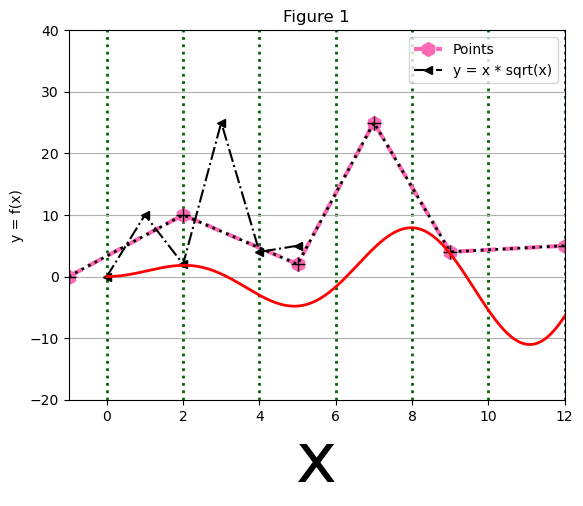

In [61]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 15, 400)

plt.plot([-1, 2, 5, 7, 9, 12], np.array([0, 10, 2, 25, 4, 5]), 'h--', c='hotpink', linewidth=3, markersize=10)  #-,:,--,-
plt.plot(np.array([0, 10, 2, 25, 4, 5]), '<-.k') # is range(len): [0, 1, 2, ...]
plt.plot([-1, 2, 5, 7, 9, 12], np.array([0, 10, 2, 25, 4, 5]), '+:k',\
        t, t*np.sin(t), '-r', linewidth=2, markersize=10) # can plot more than one trendline
plt.grid()

plt.xlabel('x', fontsize=50)
plt.ylabel('y = f(x)')
plt.title('Figure 1', loc='center')

plt.grid(axis='x', color="darkgreen", linewidth=2, ls='dotted') # dashed, solid
#plt.grid(axis='both')
#plt.grid(axis='y = f(x)')
plt.axis([-1, 12, -20, 40])
plt.legend(['Points', 'y = x * sqrt(x)'])

plt.show()